<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Impute Missing Values**


Estimated time needed: **30** minutes


In this lab, you will practice essential data wrangling techniques using the Stack Overflow survey dataset. The primary focus is on handling missing data and ensuring data quality. You will:

- **Load the Data:** Import the dataset into a DataFrame using the pandas library.

- **Clean the Data:** Identify and remove duplicate entries to maintain data integrity.

- **Handle Missing Values:** Detect missing values, impute them with appropriate strategies, and verify the imputation to create a complete and reliable dataset for analysis.

This lab equips you with the skills to effectively preprocess and clean real-world datasets, a crucial step in any data analysis project.


## Objectives


In this lab, you will perform the following:


-   Identify missing values in the dataset.

-   Apply techniques to impute missing values in the dataset.
  
-   Use suitable techniques to normalize data in the dataset.


-----


#### Install needed library


In [1]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 149.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 174.5 MB/s eta 0:00:00


### Step 1: Import Required Libraries


In [2]:
import pandas as pd

### Step 2: Load the Dataset Into a Dataframe


#### **Read Data**
<p>
The functions below will download the dataset into your browser:
</p>


In [3]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_path)

# Display the first few rows to ensure it loaded correctly
print(df.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

### Step 3. Finding and Removing Duplicates
##### Task 1: Identify duplicate rows in the dataset.


In [13]:
## Write your code here

# Identify duplicate rows
duplicate_rows = df[df.duplicated()]

# Count the number of duplicate rows
num_duplicates = duplicate_rows.shape[0]

# Display results
print("Number of duplicate rows:", num_duplicates)
print("\nFirst few duplicate rows:")
print(duplicate_rows.head())

Number of duplicate rows: 0

First few duplicate rows:
Empty DataFrame
Columns: [ResponseId, MainBranch, Age, Employment, RemoteWork, Check, CodingActivities, EdLevel, LearnCode, LearnCodeOnline, TechDoc, YearsCode, YearsCodePro, DevType, OrgSize, PurchaseInfluence, BuyNewTool, BuildvsBuy, TechEndorse, Country, Currency, CompTotal, LanguageHaveWorkedWith, LanguageWantToWorkWith, LanguageAdmired, DatabaseHaveWorkedWith, DatabaseWantToWorkWith, DatabaseAdmired, PlatformHaveWorkedWith, PlatformWantToWorkWith, PlatformAdmired, WebframeHaveWorkedWith, WebframeWantToWorkWith, WebframeAdmired, EmbeddedHaveWorkedWith, EmbeddedWantToWorkWith, EmbeddedAdmired, MiscTechHaveWorkedWith, MiscTechWantToWorkWith, MiscTechAdmired, ToolsTechHaveWorkedWith, ToolsTechWantToWorkWith, ToolsTechAdmired, NEWCollabToolsHaveWorkedWith, NEWCollabToolsWantToWorkWith, NEWCollabToolsAdmired, OpSysPersonal use, OpSysProfessional use, OfficeStackAsyncHaveWorkedWith, OfficeStackAsyncWantToWorkWith, OfficeStackAsyncAdm

##### Task 2: Remove the duplicate rows from the dataframe.



In [15]:
## Write your code here

# Remove duplicate rows 
df_cleaned = df.drop_duplicates()

# Count duplicate rows after removal
remaining_duplicates = df_cleaned.duplicated().sum()

# Print verification results
print(f"Original dataset had {df.shape[0]} rows.")
print(f"Cleaned dataset has {df_cleaned.shape[0]} rows.")
print(f"Number of duplicate rows removed: {df.shape[0] - df_cleaned.shape[0]}")
print(f"Number of duplicate rows after removal: {remaining_duplicates}")

# Save the cleaned dataset
df_cleaned.to_csv("cleaned_survey_data.csv", index=False)

Original dataset had 65437 rows.
Cleaned dataset has 65437 rows.
Number of duplicate rows removed: 0
Number of duplicate rows after removal: 0


### Step 4: Finding Missing Values
##### Task 3: Find the missing values for all columns.


In [16]:
## Write your code here

missing_values = df.isnull().sum()

# Print the count of missing values for each column
print("Missing values for each column:")
print(missing_values)

Missing values for each column:
ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 114, dtype: int64


##### Task 4: Find out how many rows are missing in the column RemoteWork.


In [17]:
## Write your code here

missing_count = df['RemoteWork'].isna().sum()
print(f"Number of missing values in 'RemoteWork' column: {missing_count}")

Number of missing values in 'RemoteWork' column: 10631


### Step 5. Imputing Missing Values
##### Task 5: Find the value counts for the column RemoteWork.


In [18]:
## Write your code here

value_counts = df['RemoteWork'].value_counts(dropna=False)  # Include NaN counts as well
print(value_counts)

RemoteWork
Hybrid (some remote, some in-person)    23015
Remote                                  20831
In-person                               10960
NaN                                     10631
Name: count, dtype: int64


##### Task 6: Identify the most frequent (majority) value in the RemoteWork column.



In [19]:
## Write your code here

most_frequent_value = df['RemoteWork'].mode()[0]  # Get the most common value
print(f"The most frequent value in 'RemoteWork' column is: {most_frequent_value}")

The most frequent value in 'RemoteWork' column is: Hybrid (some remote, some in-person)


##### Task 7: Impute (replace) all the empty rows in the column RemoteWork with the majority value.



In [21]:
## Write your code here
majority_value = df['RemoteWork'].mode()[0]  # Get the most frequent value
df['RemoteWork'].fillna(majority_value, inplace=True)  # Replace missing values

print("Missing values have been replaced with the majority value.")

Missing values have been replaced with the majority value.


##### Task 8: Check for any compensation-related columns and describe their distribution.



In [33]:
## Write your code here

# Check for missing values
missing_count = df['CompTotal'].isna().sum()
print(f"Missing values in 'CompTotal': {missing_count}")

# Get summary statistics
print(df['CompTotal'].describe())


Missing values in 'CompTotal': 31697
count     3.374000e+04
mean     2.963841e+145
std      5.444117e+147
min       0.000000e+00
25%       6.000000e+04
50%       1.100000e+05
75%       2.500000e+05
max      1.000000e+150
Name: CompTotal, dtype: float64


In [36]:
pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 186.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 166.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 91.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 136.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [37]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


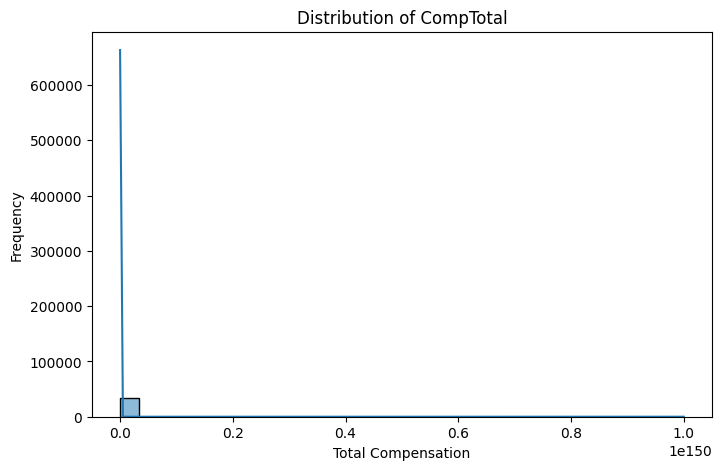

In [38]:
# Describe the distribution of compensation-related columns

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.histplot(df['CompTotal'], bins=30, kde=True)
plt.title("Distribution of CompTotal")
plt.xlabel("Total Compensation")
plt.ylabel("Frequency")
plt.show()

### Summary 


**In this lab, you focused on imputing missing values in the dataset.**

- Use the <code>pandas.read_csv()</code> function to load a dataset from a CSV file into a DataFrame.

- Download the dataset if it's not available online and specify the correct file path.



<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-11-05|1.3|Madhusudhan Moole|Updated lab|
|2024-10-29|1.2|Madhusudhan Moole|Updated lab|
|2024-09-27|1.1|Madhusudhan Moole|Updated lab|
|2024-09-26|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
